In [1]:
#import lux
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LinearRegression
#from sklearn.multioutput import MultiOutputClassifier



In [2]:
data = pd.read_csv('new_df_data.csv')

In [3]:
data.head()

,participant_class,Other,Own,University property,dep_2,dep_3,dep_4,dep_5,dep_6,dep_7,dep_8,dep_9,dep_10,dep_11,dep_12,dep_13,dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_20,com_user_1,com_user_2,com_1,com_2,com_3,gen_2,gen_3,gen_4,gen_5,race_2,race_3,race_4,race_5,race_6,race_7,race_8,race_9,race_10,os,processor,memory,harddisk
0,11,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,2
1,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,3,3
2,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,2,2
3,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,2,5
4,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,2,1


In [4]:
data.describe()

,participant_class,Other,Own,University property,dep_2,dep_3,dep_4,dep_5,dep_6,dep_7,dep_8,dep_9,dep_10,dep_11,dep_12,dep_13,dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_20,com_user_1,com_user_2,com_1,com_2,com_3,gen_2,gen_3,gen_4,gen_5,race_2,race_3,race_4,race_5,race_6,race_7,race_8,race_9,race_10,os,processor,memory,harddisk
count,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
mean,4.452206,0.015625,0.898897,0.085478,0.045956,0.089154,0.192096,0.034926,0.052390,0.026654,0.034926,0.028493,0.087316,0.026654,0.025735,0.046875,0.147978,0.005515,0.011949,0.008272,0.010110,0.010110,0.067096,0.784007,0.215993,0.023897,0.130515,0.845588,0.017463,0.006434,0.349265,0.615809,0.204044,0.297794,0.086397,0.260110,0.029412,0.021140,0.001838,0.000919,0.043199,1.768382,2.868566,2.628676,2.284926
std,3.688106,0.124077,0.301604,0.279720,0.209486,0.285098,0.394129,0.183678,0.222914,0.161145,0.183678,0.166452,0.282428,0.161145,0.158417,0.211468,0.355241,0.074090,0.108704,0.090616,0.100086,0.100086,0.250303,0.411698,0.411698,0.152799,0.337024,0.361509,0.131050,0.079989,0.476957,0.486627,0.403187,0.457499,0.281079,0.438896,0.169035,0.143916,0.042855,0.030317,0.203397,0.877833,1.091156,1.062008,1.259982
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000,2.000000
75%,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000
max,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000,5.000000


In [5]:
os_dummies = pd.get_dummies(data['os'])
os_dummies.head(1)

,1,2,3,4,5,6
0,1,0,0,0,0,0


In [6]:
data['os_1'] = os_dummies.iloc[:, 0]
data['os_2'] = os_dummies.iloc[:, 1]
data['os_3'] = os_dummies.iloc[:, 2]
data['os_4'] = os_dummies.iloc[:, 3]
data['os_5'] = os_dummies.iloc[:, 4]
data['os_6'] = os_dummies.iloc[:, 5]


In [7]:
data.head()

,participant_class,Other,Own,University property,dep_2,dep_3,dep_4,dep_5,dep_6,dep_7,dep_8,dep_9,dep_10,dep_11,dep_12,dep_13,dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_20,com_user_1,com_user_2,com_1,com_2,com_3,gen_2,gen_3,gen_4,gen_5,race_2,race_3,race_4,race_5,race_6,race_7,race_8,race_9,race_10,os,processor,memory,harddisk,os_1,os_2,os_3,os_4,os_5,os_6
0,11,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,2,1,0,0,0,0,0
1,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,3,3,0,1,0,0,0,0
2,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,2,2,0,1,0,0,0,0
3,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,2,5,0,0,1,0,0,0
4,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,2,1,1,0,0,0,0,0


In [8]:
new_df = data[['participant_class', 'dep_2', 'dep_3', 'dep_4','dep_5','dep_6','dep_7', 'dep_8','dep_9','dep_10','dep_11',
                 'dep_12','dep_13','dep_14','dep_15','dep_16','dep_17','dep_18','dep_19','dep_20','com_user_1','com_user_2',
                 'com_1','com_2','com_3', 'os', 'processor']]
#'os_1', 'os_2','os_3','os_4','os_5','os_6'

In [9]:
new_df.head(1)

,participant_class,dep_2,dep_3,dep_4,dep_5,dep_6,dep_7,dep_8,dep_9,dep_10,dep_11,dep_12,dep_13,dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_20,com_user_1,com_user_2,com_1,com_2,com_3,os,processor
0,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2


In [10]:
#new_df_model.to_csv('data_for_lux.csv', index= False)

# Model creation

In [11]:
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:, -1].values

In [12]:
X.shape

(1088, 26)

In [13]:
print(X)

[[11  1  0 ...  1  0  1]
 [ 4  0  1 ...  0  1  2]
 [ 4  0  1 ...  0  1  2]
 ...
 [ 1  0  0 ...  0  1  2]
 [16  0  1 ...  0  1  2]
 [ 1  0  0 ...  0  1  2]]


In [14]:
print(y)

[2 3 2 ... 2 2 3]


In [15]:
# new_df_model.os.value_counts()

In [16]:
new_df.processor.value_counts()

2    421
3    342
4    136
5    130
1     59
Name: processor, dtype: int64

In [17]:
# new_df_model.memory.value_counts()

In [18]:
# new_df_model.harddisk.value_counts()

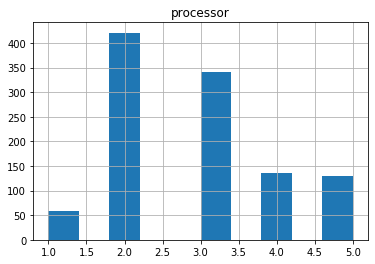

In [19]:
hist = new_df.hist(column='processor')

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#stratify=y. This tells train_test_split to make sure that the training and test datasets contain examples of each class in
#the same proportions as in the original dataset.

# Logistic Regression

In [21]:

log_regressor = LogisticRegression(max_iter=1000)
log_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_test_log = log_regressor.predict(X_test)

In [23]:
# print(y_pred_test_log)

In [24]:
count_misclassified = (y_test != y_pred_test_log).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_log = metrics.accuracy_score(y_test, y_pred_test_log)
print('Accuracy: {:.2f}'.format(accuracy_log))


Misclassified samples: 136
Accuracy: 0.38


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_score(y_test, y_pred_test_log)
cm = confusion_matrix(y_test, y_pred_test_log)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_log)*100)
print(classification_report(y_test, y_pred_test_log))

[[ 0  4  8  0  0]
 [ 1 60 19  0  4]
 [ 0 48 17  0  4]
 [ 1 23  1  0  2]
 [ 0 14  7  0  5]]
Accuracy:  37.61467889908257
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.40      0.71      0.52        84
           3       0.33      0.25      0.28        69
           4       0.00      0.00      0.00        27
           5       0.33      0.19      0.24        26

    accuracy                           0.38       218
   macro avg       0.21      0.23      0.21       218
weighted avg       0.30      0.38      0.32       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#k-fold
accuracies1 = cross_val_score(estimator = log_regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 41.03 %
Standard Deviation: 4.77 %


In [27]:
# grid_search
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.25, 0.50, 0.75, 1.0], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                                                                 'saga'], 'max_iter': [100, 200, 300, 400, 500]}]
grid_search = GridSearchCV(estimator = log_regressor,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 41.84 %
Best Parameters: {'C': 0.25, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Random Forest

In [28]:
RFclassifier = RandomForestClassifier(random_state=1)
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [29]:
y_pred_test_rf = RFclassifier.predict(X_test)

In [30]:
#print(y_pred_test_rf)

In [31]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_test_rf)
cm = confusion_matrix(y_test, y_pred_test_rf)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_rf)*100)
print(classification_report(y_test, y_pred_test_rf))

[[ 0  5  6  0  1]
 [ 3 54 23  0  4]
 [ 1 32 31  2  3]
 [ 1 17  3  4  2]
 [ 1 12  9  1  3]]
Accuracy:  42.201834862385326
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.45      0.64      0.53        84
           3       0.43      0.45      0.44        69
           4       0.57      0.15      0.24        27
           5       0.23      0.12      0.15        26

    accuracy                           0.42       218
   macro avg       0.34      0.27      0.27       218
weighted avg       0.41      0.42      0.39       218



## K-fold cv

In [32]:
accuracies2 = cross_val_score(estimator = RFclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 33.79 %
Standard Deviation: 3.30 %


## Grid search 

In [33]:
parameters = [{'n_estimators': [5, 10, 20, 50, 100, 300, 500, 1000], 'criterion': ['gini', 'entropy'],'max_features' : 
               ['auto', 'log2', 0.4,0.6, 0.8, 1.0]}]
grid_search = GridSearchCV(estimator = RFclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 35.75 %
Best Parameters: {'criterion': 'gini', 'max_features': 1.0, 'n_estimators': 1000}


In [34]:
# Get and reshape confusion matrix data
# matrix = confusion_matrix(y_test, y_pred_test_rf)
# matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# # Build the plot
# plt.figure(figsize=(16,7))
# sns.set(font_scale=1.4)
# sns.heatmap(matrix, annot=True, annot_kws={'size':10},
#             cmap=plt.cm.Greens, linewidths=0.2)

# # Add labels to the plot
# class_names = ['mac os', 'windows os', 'linux', 'chrome os','multiple os', 'other']
# tick_marks = np.arange(len(class_names))
# tick_marks2 = tick_marks + 0.5
# plt.xticks(tick_marks, class_names, rotation=25)
# plt.yticks(tick_marks2, class_names, rotation=0)
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.title('Confusion Matrix for Random Forest Model')
# plt.show()

In [35]:
# print(classification_report(y_test, y_pred_test_rf, zero_division = 'warn'))

In [36]:
# set(y_test) - set(y_pred_test_rf)

# KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
y_pred_test_knn = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test_knn)
print(cm)
print("Accuracy: : {:.2f} %".format(metrics.accuracy_score(y_test, y_pred_test_knn)))
print(classification_report(y_test, y_pred_test_knn))

[[ 2  4  6  0  0]
 [ 1 58 23  1  1]
 [ 3 44 19  0  3]
 [ 0 20  4  3  0]
 [ 2 14  6  1  3]]
Accuracy: : 0.39 %
              precision    recall  f1-score   support

           1       0.25      0.17      0.20        12
           2       0.41      0.69      0.52        84
           3       0.33      0.28      0.30        69
           4       0.60      0.11      0.19        27
           5       0.43      0.12      0.18        26

    accuracy                           0.39       218
   macro avg       0.40      0.27      0.28       218
weighted avg       0.40      0.39      0.35       218



## K-fold cv

In [39]:
accuracies3 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))

Accuracy: 36.67 %
Standard Deviation: 3.90 %


## Grid search 

In [40]:
parameters = [{'n_neighbors': [36, 45, 46, 55, 56, 115, 116, 215, 216, 250, 275, 276, 315, 316], 'weights': 
               ['uniform', 'distance']}]
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 40.23 %
Best Parameters: {'n_neighbors': 46, 'weights': 'uniform'}


In [41]:
#Grid search

# Decision tree

In [42]:
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
y_pred_test_decision = decision_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test_decision)
print(cm)
print("Accuracy: {:.2f} %".format(metrics.accuracy_score(y_test, y_pred_test_decision)))
print(classification_report(y_test, y_pred_test_decision))

[[ 1  7  3  0  1]
 [ 5 53 21  0  5]
 [ 2 35 26  2  4]
 [ 1 19  2  3  2]
 [ 2 16  4  2  2]]
Accuracy: 0.39 %
              precision    recall  f1-score   support

           1       0.09      0.08      0.09        12
           2       0.41      0.63      0.50        84
           3       0.46      0.38      0.42        69
           4       0.43      0.11      0.18        27
           5       0.14      0.08      0.10        26

    accuracy                           0.39       218
   macro avg       0.31      0.26      0.25       218
weighted avg       0.38      0.39      0.36       218



## K-fold cv

In [44]:
accuracies4 = cross_val_score(estimator = decision_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))

Accuracy: 36.44 %
Standard Deviation: 3.98 %


## Grid search 

In [45]:
parameters = [{'criterion': ['gini', 'entropy'],'max_features' : ['auto', 'log2', 0.4,0.6, 0.8, 1.0]}]
grid_search = GridSearchCV(estimator = decision_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 36.55 %
Best Parameters: {'criterion': 'gini', 'max_features': 1.0}


# XGBoost

In [46]:
# from xgboost import XGBClassifier
# xg_classifier = XGBClassifier()
# xg_classifier.fit(X_train, y_train)

# SVM

In [47]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
y_pred_test_svm = svm.predict(X_test)

In [54]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test_svm)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_svm))
print(classification_report(y_test, y_pred_test_svm))

[[ 0  4  8  0  0]
 [ 0 67 16  0  1]
 [ 0 49 20  0  0]
 [ 0 20  7  0  0]
 [ 0 15  9  0  2]]
Accuracy:  0.40825688073394495
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.43      0.80      0.56        84
           3       0.33      0.29      0.31        69
           4       0.00      0.00      0.00        27
           5       0.67      0.08      0.14        26

    accuracy                           0.41       218
   macro avg       0.29      0.23      0.20       218
weighted avg       0.35      0.41      0.33       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-fold cross validation

In [50]:
accuracies5 = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))

Accuracy: 39.54 %
Standard Deviation: 3.61 %


## Grid search

In [51]:

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 40.92 %
Best Parameters: {'C': 0.25, 'gamma': 0.6, 'kernel': 'rbf'}


# Ensembling all of the above or combination of them

In [52]:
bagging1 = BaggingClassifier(base_estimator=decision_classifier)
bagging2 = BaggingClassifier(base_estimator=knn)

In [55]:
bagging1.fit(X_train, y_train)
bagging2.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [56]:
y_pred_test_bagging1 = bagging1.predict(X_test)
y_pred_test_bagging2 = bagging2.predict(X_test)

In [58]:
cm = confusion_matrix(y_test, y_pred_test_bagging1)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_bagging1))
print(classification_report(y_test, y_pred_test_bagging1))

[[ 2  5  4  0  1]
 [ 4 46 26  4  4]
 [ 3 31 25  3  7]
 [ 1 15  3  6  2]
 [ 2 15  3  4  2]]
Accuracy:  0.37155963302752293
              precision    recall  f1-score   support

           1       0.17      0.17      0.17        12
           2       0.41      0.55      0.47        84
           3       0.41      0.36      0.38        69
           4       0.35      0.22      0.27        27
           5       0.12      0.08      0.10        26

    accuracy                           0.37       218
   macro avg       0.29      0.28      0.28       218
weighted avg       0.36      0.37      0.36       218



In [59]:
cm = confusion_matrix(y_test, y_pred_test_bagging2)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_bagging2))
print(classification_report(y_test, y_pred_test_bagging2))

[[ 0  3  9  0  0]
 [ 1 57 23  0  3]
 [ 1 41 23  0  4]
 [ 0 19  3  2  3]
 [ 0 17  5  1  3]]
Accuracy:  0.38990825688073394
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.42      0.68      0.52        84
           3       0.37      0.33      0.35        69
           4       0.67      0.07      0.13        27
           5       0.23      0.12      0.15        26

    accuracy                           0.39       218
   macro avg       0.34      0.24      0.23       218
weighted avg       0.39      0.39      0.34       218



In [60]:
parameters = [{
 'bootstrap': [True, False],
 'bootstrap_features': [True, False],    
 'n_estimators': [15, 20, 25, 30, 35, 40],
 'max_samples' : [0.6, 0.8, 1.0],
 'max_features': [0.5,0.6,0.7,0.8,0.9,1.0]  
#  'base_estimator__bootstrap': [True, False],    
#  'base_estimator__n_estimators': [100, 200, 300, 500, 1000],
#  'base_estimator__max_features' : [0.6, 0.8, 1.0]
}]

In [61]:
grid_search = GridSearchCV(bagging1, 
                           param_grid=parameters, 
                           scoring = 'accuracy',
                           cv=10, n_jobs= -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 42.18 %
Best Parameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.8, 'n_estimators': 40}


In [62]:
grid_search = GridSearchCV(bagging2, 
                           param_grid=parameters, 
                           scoring = 'accuracy',
                           cv=10, n_jobs= -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 42.64 %
Best Parameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 15}


In [63]:
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [decision_classifier, knn, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
#     print "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label)
    print ("Accuracy: {:.2f} (+/- {:.2f}) [{}]".format(scores.mean(), scores.std(), label))

        
    clf.fit(X_train, y_train)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
#     plt.title(label)

# plt.show()

Accuracy: 0.36 (+/- 0.02) [Decision Tree]
Accuracy: 0.36 (+/- 0.02) [K-NN]
Accuracy: 0.35 (+/- 0.03) [Bagging Tree]
Accuracy: 0.36 (+/- 0.03) [Bagging K-NN]


<Figure size 720x576 with 0 Axes>

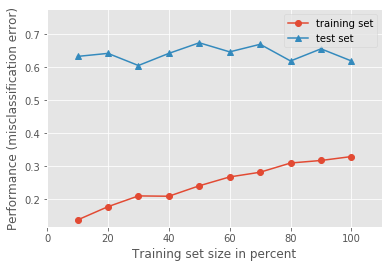

In [64]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [65]:
#Ensemble Size
# num_est = map(int, np.linspace(1,100,20))
# bg_clf_cv_mean = []
# bg_clf_cv_std = []
# for n_est in num_est:    
#     bg_clf = BaggingClassifier(base_estimator=decision_classifier, n_estimators=n_est, max_samples=0.8, max_features=0.8)
#     scores = cross_val_score(bg_clf, X_train, y_train, cv=3, scoring='accuracy')
#     bg_clf_cv_mean.append(scores.mean())
#     bg_clf_cv_std.append(scores.std())

In [66]:
# plt.figure()
# (_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
# for cap in caps:
#     cap.set_markeredgewidth(1)                                                                                                                                
# plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
# plt.show()

# Stacking

In [67]:
from mlxtend.classifier import StackingClassifier

stacking_classifier = StackingClassifier(classifiers=[decision_classifier, RFclassifier, knn, svm], 
                          meta_classifier=log_regressor)
# from sklearn.ensemble import StackingClassifier

# stacking_classifier = StackingClassifier(estimators= [decision_classifier, RFclassifier, knn, svm], 
#                                          final_estimator= log_regressor,
#                                         cv = 3)

In [68]:
for clf, label in zip([decision_classifier, RFclassifier, knn, svm, stacking_classifier], 
                      ['Decision Tree',
                       'Random Forest',
                       'KNN', 
                       'SVM',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.36 (+/- 0.02) [Decision Tree]
Accuracy: 0.34 (+/- 0.03) [Random Forest]
Accuracy: 0.36 (+/- 0.02) [KNN]
Accuracy: 0.40 (+/- 0.01) [SVM]
Accuracy: 0.34 (+/- 0.03) [StackingClassifier]


In [69]:
# label = ['Decision Tree', 'Random Forest', 'K-NN', 'SVM', 'StackingClassifier']
# clf_list = [decision_classifier, RFclassifier, knn, svm, stacking_classifier]

# fig = plt.figure(figsize=(10, 8))
# gs = gridspec.GridSpec(2, 2)
# grid = itertools.product([0,1],repeat=2)

# for clf, label, grd in zip(clf_list, label, grid):        
#     scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
# #     print "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label)
#     print ("Accuracy: {:.2f} (+/- {:.2f}) [{}]".format(scores.mean(), scores.std(), label))

        
#     clf.fit(X_train, y_train)
# #     ax = plt.subplot(gs[grd[0], grd[1]])
# #     fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
# #     plt.title(label)

# # plt.show()

In [70]:
stacking_classifier.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                              

In [71]:
y_pred_test_stacking = stacking_classifier.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_pred_test_stacking)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_stacking))
print(classification_report(y_test, y_pred_test_stacking))

[[ 1  6  4  0  1]
 [ 2 57 21  0  4]
 [ 2 34 30  0  3]
 [ 0 19  5  0  3]
 [ 0 16  7  0  3]]
Accuracy:  0.41743119266055045
              precision    recall  f1-score   support

           1       0.20      0.08      0.12        12
           2       0.43      0.68      0.53        84
           3       0.45      0.43      0.44        69
           4       0.00      0.00      0.00        27
           5       0.21      0.12      0.15        26

    accuracy                           0.42       218
   macro avg       0.26      0.26      0.25       218
weighted avg       0.34      0.42      0.37       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
accuracies6 = cross_val_score(estimator = stacking_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))

Accuracy: 34.94 %
Standard Deviation: 3.22 %
